# Neural Networks for Handwritten Digit Recognition, Multiclass 

In this exercise, you will use a neural network to recognize the hand-written digits 0-9.


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

## 2 - Softmax Function

The softmax function using NumPy can be written:

In [2]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    ez_vector = np.exp(z)
    a = ez_vector / np.sum(ez_vector)
    ### END CODE HERE ### 
    return a

In [3]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


## 3 - Neural Networks
### 3.1 Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 

### 3.2 Dataset
You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`

In [4]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    return X, y

- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

In [5]:
# load dataset
X, y = load_data()
print("Number of training(features) example:", X.shape[0])
print("The total number of pixels in each image", X[0].shape)
print("The total number of labels:", y.shape[0])

Number of training(features) example: 5000
The total number of pixels in each image (400,)
The total number of labels: 5000


- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X` and `y`.  

In [7]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [8]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


#### 2.2.2 Visualizing the Data

You will begin by visualizing one of the training set. 

In [9]:
def random_sel_img(m):
    random_index = np.random.randint(m)
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    return X_random_reshaped, random_index


Text(0.5, 1.0, 'random selected number = 7')

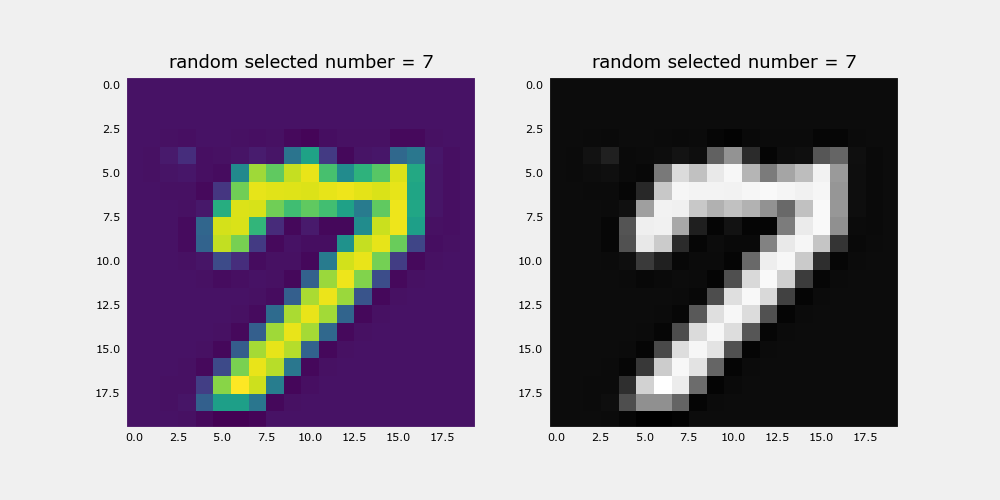

In [13]:
plt.close("all")
m, n = X.shape
fig, ax = plt.subplots(1,2, figsize=(10,5))
sel_images1 = []
X_random_reshaped, random_index = random_sel_img(m)

# Display the image
ax[0].imshow(X_random_reshaped)
ax[1].imshow(X_random_reshaped, cmap='gray')
# Display the label above the image
ax[0].set_title(f'random selected number = {y[random_index,0]}', fontsize=13)
ax[1].set_title(f'random selected number = {y[random_index,0]}', fontsize=13)
# ax.set_axis_off()



- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

In [11]:
def random_sel_imgs(m, sel_images):
    random_index = np.random.randint(m)
    sel_images.append(random_index)
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    return X_random_reshaped, sel_images, random_index


random selected images =  [2564, 721, 76, 2228, 985, 374, 4903, 3889, 277, 3429, 1543, 2227, 4951, 330, 503, 4032, 2811, 3641, 3620, 2, 3697, 339, 4691, 187, 1245, 3404, 874, 2253, 620, 3614, 4780, 4122, 264, 1087, 321, 926, 1251, 3494, 4797, 3376, 3071, 2686, 610, 3440, 1736, 2775, 680, 3191, 3921, 4298, 905, 3555, 1516, 4718, 3212, 3988, 3038, 3249, 862, 4391, 2048, 2544, 3059, 2009]


Text(0.5, 0.98, 'Label, image')

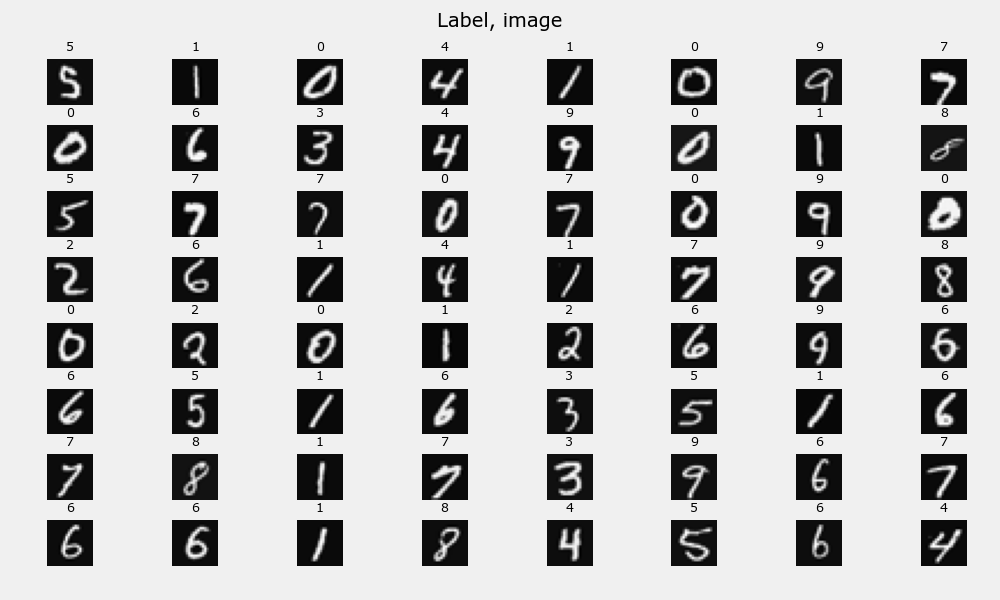

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(10,6))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
sel_images = []
# For each iteration it would yield the next axes from that array, such that you may easily plot to all axes in a single loop.
for i,ax in enumerate(axes.flat):

    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped, sel_images, random_index = random_sel_imgs(m, sel_images)
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0], fontsize=9)
    ax.set_axis_off()
print('random selected images = ', sel_images)
fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W2_Assigment_NN.png" width="600" height="450">

- Therefore, the shapes of `W`, and `b`,  are 
    - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
    - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
    - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 

<a name="4.5"></a>
### 4.5 Softmax placement
numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

In [15]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))


In [16]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST     

All tests passed!


In [18]:
[layer1, layer2, layer3] = model.layers
[layer1, layer2, layer3]

In [19]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [20]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    batch_size=32,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 491us/step - loss: 1.4300
Epoch 2/40
157/157 [==============================] - 0s 491us/step - loss: 0.6221
Epoch 3/40
157/157 [==============================] - 0s 488us/step - loss: 0.4500
Epoch 4/40
157/157 [==============================] - 0s 483us/step - loss: 0.3750
Epoch 5/40
157/157 [==============================] - 0s 458us/step - loss: 0.3305
Epoch 6/40
157/157 [==============================] - 0s 452us/step - loss: 0.2954
Epoch 7/40
157/157 [==============================] - 0s 455us/step - loss: 0.2665
Epoch 8/40
157/157 [==============================] - 0s 477us/step - loss: 0.2474
Epoch 9/40
157/157 [==============================] - 0s 459us/step - loss: 0.2324
Epoch 10/40
157/157 [==============================] - 0s 455us/step - loss: 0.2125
Epoch 11/40
157/157 [==============================] - 0s 456us/step - loss: 0.1990
Epoch 12/40
157/157 [==============================] - 0s 455us/step - loss: 0.1876
E

In [23]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

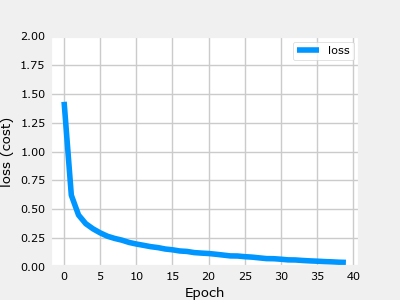

In [24]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1016] contains an image of a two.

In [38]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

[2]
(400,)


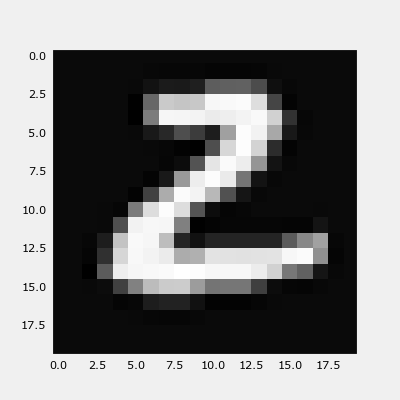

1/1 [==============================] - 0s 19ms/step
 predicting a Two: 
[[ -2.35  -3.63  12.3    6.45 -16.47  -0.15  -4.1  -23.36  -2.59  -8.18]]
 Largest Prediction index: 2


In [43]:
image_of_two = X[1016]
print(y[1016])
print(image_of_two.shape)
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [44]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[4.33e-07 1.20e-07 9.97e-01 2.88e-03 3.20e-13 3.90e-06 7.47e-08 3.25e-16
  3.41e-07 1.27e-09]]
Total of predictions: 1.000


In [45]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 9ms/step


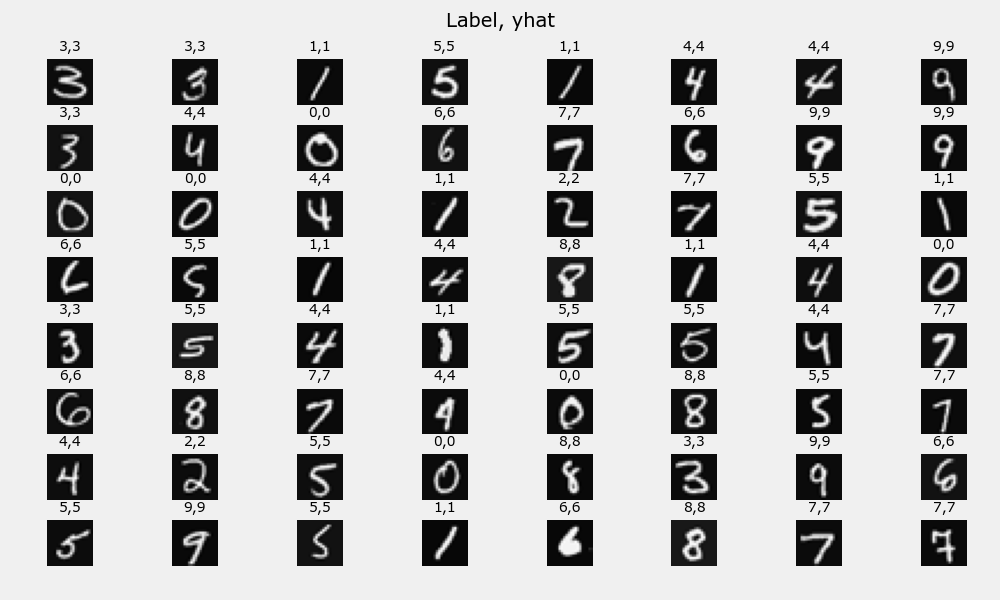

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(10,6))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 10ms/step
25 errors out of 5000 images


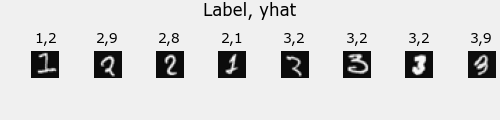

In [49]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")